Importing Dependecies

In [58]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


Importing Data

In [59]:
fitness_data = pd.read_csv("C:/Users/USER/Desktop/Datasets/Fitness_Tracker_Data.csv")

In [60]:
fitness_data.head(10)

,User_ID,Date,Steps,Heart_Rate_avg,Calories_Burned,Workout_Type
0,4001,2024-01-01,14748,68,598,Cardio
1,4002,2024-01-02,8943,74,428,Cardio
2,4003,2024-01-03,14195,69,724,NaN
3,4004,2024-01-04,7963,97,284,Strength
4,4005,2024-01-05,14671,93,622,Yoga
5,4006,2024-01-06,5207,64,437,Cardio
6,4007,2024-01-07,4717,67,331,Strength
7,4008,2024-01-08,11552,67,603,Yoga
8,4009,2024-01-09,8038,69,204,Cardio
9,4010,2024-01-10,1324,96,398,Strength


In [61]:
# Checking the number of Rows and Columns 
fitness_data.shape

(100, 6)

In [62]:
# Checking general info about the dataset 
fitness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User_ID          100 non-null    int64 
 1   Date             100 non-null    object
 2   Steps            100 non-null    int64 
 3   Heart_Rate_avg   100 non-null    int64 
 4   Calories_Burned  100 non-null    int64 
 5   Workout_Type     79 non-null     object
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


In [63]:
# Checking Missing Values 
fitness_data.isna().sum()

User_ID             0
Date                0
Steps               0
Heart_Rate_avg      0
Calories_Burned     0
Workout_Type       21
dtype: int64

In [64]:
# Checking Summmary Statistics 
fitness_data.describe()

,User_ID,Steps,Heart_Rate_avg,Calories_Burned
count,100.000000,100.00000,100.000000,100.000000
mean,4050.500000,8455.22000,79.690000,473.640000
std,29.011492,4157.31053,10.370602,181.639588
min,4001.000000,1000.00000,61.000000,160.000000
25%,4025.750000,4855.00000,70.000000,304.500000
50%,4050.500000,8681.50000,80.000000,488.500000
75%,4075.250000,11662.00000,89.000000,623.250000
max,4100.000000,14972.00000,99.000000,795.000000


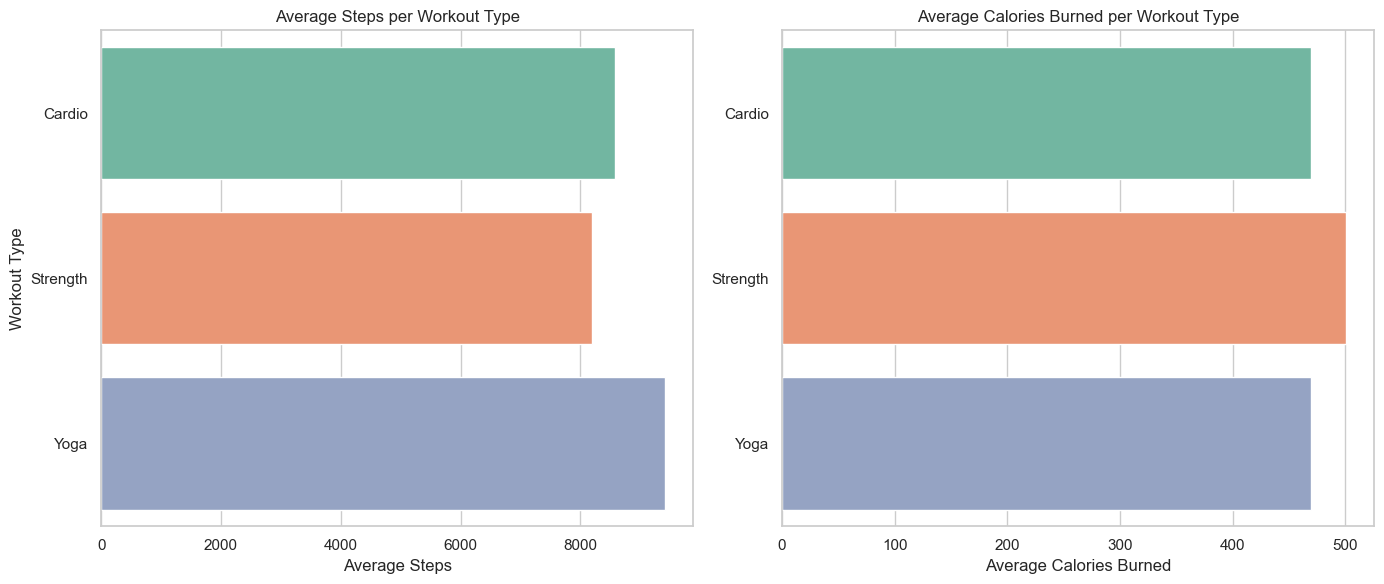

In [65]:
# Group by Workout_Type and compute average Steps and Calories_Burned
workout_stats = fitness_data.groupby('Workout_Type')[['Steps', 'Calories_Burned']].mean().reset_index()

# Create a consistent color palette
unique_workouts = workout_stats['Workout_Type'].unique()
palette = sns.color_palette("Set2", len(unique_workouts))
color_dict = dict(zip(unique_workouts, palette))

# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Average Steps per Workout Type
sns.barplot(
    data=workout_stats,
    x='Steps',
    y='Workout_Type',
    palette=color_dict,
    ax=axes[0]
)
axes[0].set_title('Average Steps per Workout Type')
axes[0].set_xlabel('Average Steps')
axes[0].set_ylabel('Workout Type')

# Average Calories Burned per Workout Type
sns.barplot(
    data=workout_stats,
    x='Calories_Burned',
    y='Workout_Type',
    palette=color_dict,
    ax=axes[1]
)
axes[1].set_title('Average Calories Burned per Workout Type')
axes[1].set_xlabel('Average Calories Burned')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

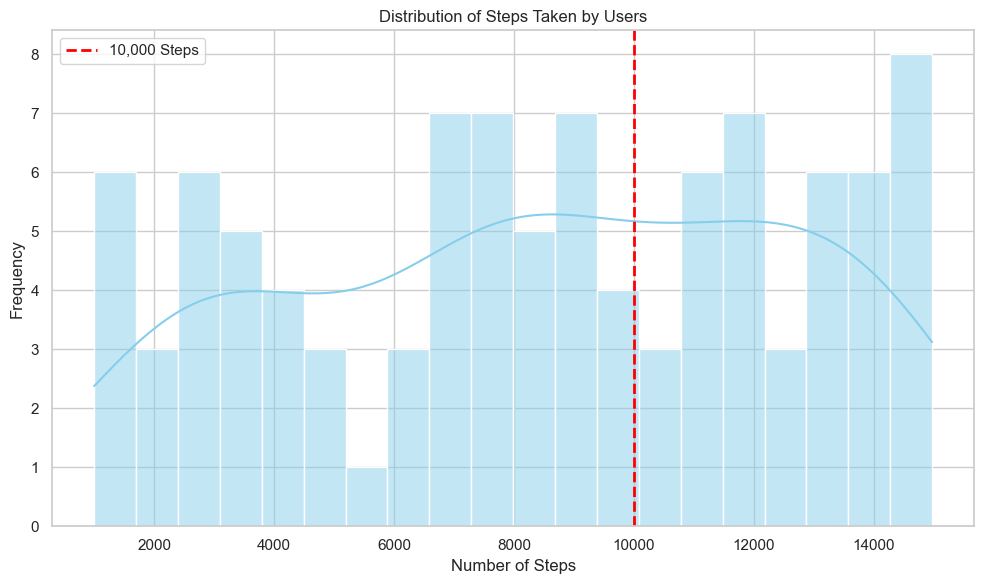

In [66]:
# Set plot style
sns.set(style="whitegrid")

# Create histogram + KDE
plt.figure(figsize=(10, 6))
sns.histplot(data=fitness_data, x='Steps', kde=True, color='skyblue', bins=20)

# Add vertical line for 10,000 steps
plt.axvline(x=10000, color='red', linestyle='--', linewidth=2, label='10,000 Steps')

# Labels and title
plt.title('Distribution of Steps Taken by Users')
plt.xlabel('Number of Steps')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

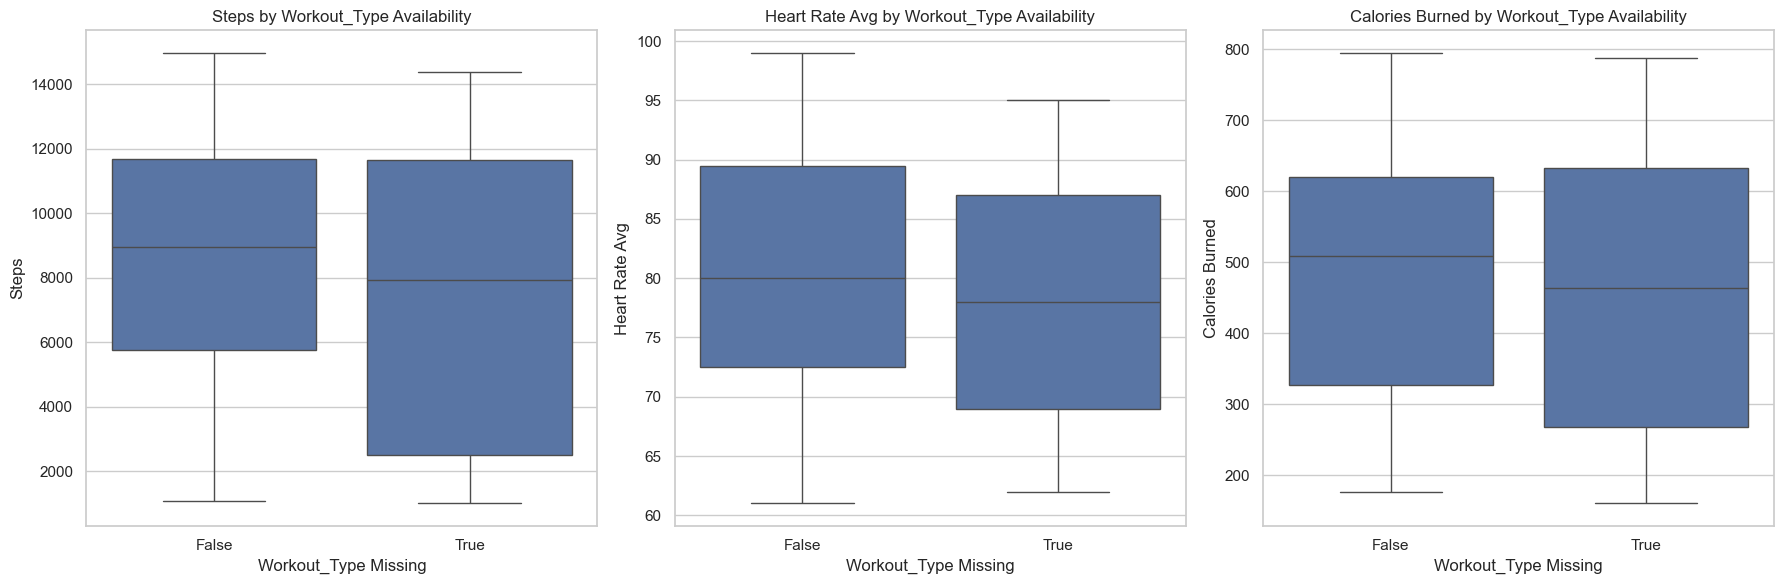

In [67]:
# Create a new column to indicate missing Workout_Type
fitness_data['Workout_Type_Missing'] = fitness_data['Workout_Type'].isna()

# Set up the plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.set(style="whitegrid")

# Boxplot for Steps
sns.boxplot(x='Workout_Type_Missing', y='Steps', data=fitness_data, ax=axes[0])
axes[0].set_title('Steps by Workout_Type Availability')
axes[0].set_xlabel('Workout_Type Missing')
axes[0].set_ylabel('Steps')

# Boxplot for Heart_Rate_avg
sns.boxplot(x='Workout_Type_Missing', y='Heart_Rate_avg', data=fitness_data, ax=axes[1])
axes[1].set_title('Heart Rate Avg by Workout_Type Availability')
axes[1].set_xlabel('Workout_Type Missing')
axes[1].set_ylabel('Heart Rate Avg')

# Boxplot for Calories_Burned
sns.boxplot(x='Workout_Type_Missing', y='Calories_Burned', data=fitness_data, ax=axes[2])
axes[2].set_title('Calories Burned by Workout_Type Availability')
axes[2].set_xlabel('Workout_Type Missing')
axes[2].set_ylabel('Calories Burned')

plt.tight_layout()
plt.show()